In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas

In [32]:
#Variaveis estaticas
#RECIPIENTE DE CERAMICA

#Temperaturas do ambiente, cafe e do recipiente, respectivamente, em K
Ta = 25.6 + 273.15
Tc = 75.20 + 273.15
Tr = 67.3 + 273.15

#Dimensões da caneca, r (raio interno), R(raio externo), rc(raio intermediario) e h(altura) em metros:
r = 0.04 - 0.003
R = 0.04
re = (r + R) / 2
h = 0.09

#Massa do cafe e do recipiente em kg, respectivamente:
mc = (math.pi * (r ** 2) * (0.047)) * 1000
mr = ((math.pi * (R ** 2) * h) - (math.pi * (r ** 2) * (h-0.01))) * 2480

#Calores especificos do cafe e do recipiente, em J/(kg*K)
cc = 4186
cr = 1070

#Condutividade termica da ceramica em W/m⋅𝐾
K = 1.5

#coeficiente de convecção do ar em 𝑊/(𝑚^2⋅𝐾)
hs = 40

In [33]:
def modelo(l, t):
    Tc = l[0]
    Tr = l[1]
    Ti = Tc
    
    qs = (Tc - Ta) / (1 / (hs * math.pi * r ** 2))
    qr = (Tc - Tr) / ((math.log(re / r))/ (K * 2 * math.pi * h))
    qf = (Ti - Ta) / ((math.log(R/re) / (K * 2 * math.pi * h)) + (1 / (hs * 2 * math.pi * R * h)))
    dTcdt = (-1 / (mc * cc)) * (qs + qr)
    dTrdt = (1 / (mr * cr)) * (qr - qf)
    return [dTcdt, dTrdt]

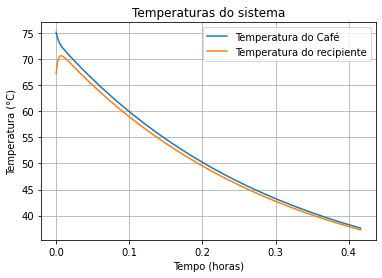

In [34]:
lista_tempo = np.arange(0, 1500, 2)
ci = [Tc, Tr]

x = odeint(modelo, ci, lista_tempo)
tCafe = x[:,0]
tRecipiente = x[:,1]

plt.plot(lista_tempo/3600, tCafe - 273.15, label='Temperatura do Café')
plt.plot(lista_tempo/3600, tRecipiente - 273.15, label='Temperatura do recipiente')
plt.legend()
plt.title("Temperaturas do sistema")
plt.xlabel("Tempo (horas)")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

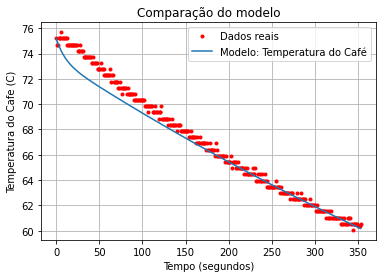

In [35]:
dados_reais = [75.20,74.71,74.71,75.20,75.20,75.20,75.68,75.20,75.20,75.20,75.20,75.20,75.20,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.22,74.22,74.22,74.71,74.22,74.22,74.22,73.73,73.73,73.73,73.73,73.73,73.73,73.73,73.73,73.73,73.24,73.24,73.73,73.24,73.24,73.24,73.24,72.75,72.75,72.75,72.75,73.24,72.75,72.75,72.75,72.27,72.27,72.27,72.27,72.27,72.27,72.75,72.27,71.78,72.27,72.27,71.78,71.78,71.78,71.78,71.78,71.29,71.29,71.78,71.29,70.80,71.29,71.29,71.29,71.29,71.29,70.80,71.29,70.80,70.80,70.80,70.80,70.80,70.80,70.31,70.80,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,69.82,69.82,69.82,69.34,69.82,69.82,69.82,69.82,69.82,69.34,69.34,69.34,69.82,69.34,69.34,69.34,68.85,69.34,69.34,69.82,68.85,68.85,68.85,68.85,68.85,68.85,68.85,68.36,68.85,68.36,68.36,68.85,68.36,68.36,68.36,68.36,68.36,67.87,68.36,68.36,68.36,68.36,67.87,67.87,67.87,67.87,67.87,67.87,67.87,67.87,67.87,67.38,67.38,67.87,67.38,67.38,67.38,67.38,67.38,66.89,67.38,66.89,66.89,66.89,67.38,66.89,66.89,66.89,66.89,66.89,66.89,66.41,66.89,66.41,66.41,66.89,66.41,66.41,66.41,66.41,66.41,65.92,66.89,65.92,66.41,65.92,65.92,65.92,65.92,65.92,65.92,65.92,65.92,65.43,65.92,65.43,65.43,65.43,65.43,65.43,65.92,64.94,65.43,65.43,65.43,64.94,65.43,64.94,65.43,64.94,64.94,64.94,64.94,64.94,64.94,64.45,64.94,64.45,64.94,64.45,64.45,64.45,64.45,64.45,64.45,64.94,64.45,64.45,64.94,63.96,63.96,64.45,63.96,64.45,63.96,63.96,64.45,63.96,63.96,64.45,63.96,63.48,63.96,63.48,63.48,63.48,63.48,63.48,63.48,63.48,63.48,63.48,63.96,63.48,63.48,63.48,63.48,62.99,63.48,62.99,62.99,62.99,62.99,62.99,62.99,62.99,62.99,62.99,62.50,62.99,62.99,62.99,62.50,62.50,62.50,62.50,62.99,62.50,62.50,62.50,62.50,62.99,62.50,62.50,62.50,62.01,62.50,62.01,62.01,62.01,62.01,62.50,62.01,62.01,62.01,62.01,62.01,62.01,61.52,62.01,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.04,61.52,61.04,61.52,61.04,61.04,61.52,61.04,61.04,61.04,61.04,61.04,61.04,61.04,61.04,61.04,61.04,60.55,61.04,60.55,60.55,61.04,60.55,60.55,60.55,60.55,61.04,61.04,61.04,60.55,60.55,60.06,60.55,60.55,60.55,60.55,60.55,60.34,60.34,60.34,60.50]

lista_tempo_dados = np.arange(0, len(dados_reais), 1)

x_dado = odeint(modelo, ci, lista_tempo_dados)
tCafe_2 = x_dado[:,0]

plt.plot(lista_tempo_dados, dados_reais, 'ro', markersize=3, label='Dados reais')
plt.plot(lista_tempo_dados, tCafe_2 - 273.15, label='Modelo: Temperatura do Café')
plt.legend()
plt.title("Comparação do modelo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Temperatura do Cafe (C)")
plt.grid(True)
plt.show()

In [36]:
### TAXA DE ERRO ###
ldr = list(dados_reais)
lt2 = list(tCafe_2-273.15)
ltd = list(lista_tempo_dados)
erro = 0
erro_max = 0

for i in range(len(ltd)):
    if abs(ldr[i]-lt2[i]) > erro_max:
        erro_max = abs(ldr[i]-lt2[i])
    erro += abs(ldr[i]-lt2[i])
erro = erro / len(ltd)
print("ERRO:")
print(str(round(erro, 3)) + '%')
print('ERRO MAXIMO:')
print(str(round(erro_max, 3)) + '°C')
    

ERRO:
0.595%
ERRO MAXIMO:
2.302°C


In [37]:
def modelo2(l, t, R):
    mr = ((math.pi * (R ** 2) * h) - (math.pi * (r ** 2) * (h-0.01))) * 2480
    re = (r + R) / 2
    
    Tc = l[0]
    Tr = l[1]
    Ti = Tr
    
    qs = (Tc - Ta) / (1 / (hs * math.pi * r ** 2))
    qr = (Tc - Tr) / ((math.log(re / r))/ (K * 2 * math.pi * h))
    qf = (Ti - Ta) / ((math.log(R/re) / (K * 2 * math.pi * h)) + (1 / (hs * 2 * math.pi * R * h)))
    dTcdt = (1 / (mc * cc)) * (-qs - qr)
    dTrdt = (1 / (mr * cr)) * (qr - qf)
    return [dTcdt, dTrdt]

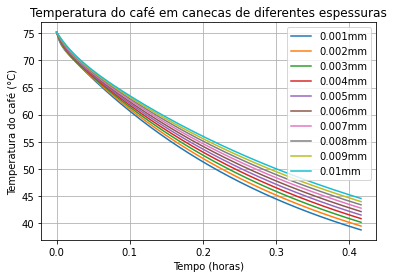

In [38]:
#lista_espessura = np.arange(0.001, 0.011, 0.001)
lista_espessura = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010]
lista_odeint = []

for i in lista_espessura:
    x = odeint(modelo2, ci, lista_tempo, args=(R+i,))
    lista_odeint.append(x[:,0])
    plt.plot(lista_tempo / 3600, x[:,0] - 273.15, label = f'{i}mm')


plt.legend()
plt.title("Temperatura do café em canecas de diferentes espessuras")
plt.xlabel("Tempo (horas)")
plt.ylabel("Temperatura do café (°C)")
plt.grid(True)
plt.show()

In [39]:
def conclusivo(lo, lt):
    temp = 60 + 273.15
    
    lista_tcafe = list(lo)
    lista_tempo = list(lt)
    index = int()
    
    for i in lista_tcafe:
        if i <= temp:
            index = lista_tcafe.index(i)
            break
    return lista_tempo[index]

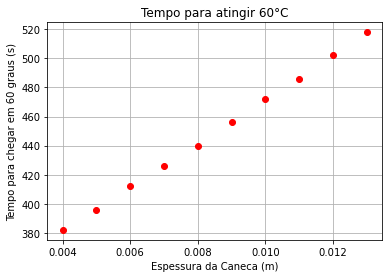

In [40]:
lista_tempo_temp = []
lista_espessura_grafico = []
for i in lista_espessura:
    lista_espessura_grafico.append(R - r + i)
for i in lista_odeint:
    lista_tempo_temp.append(conclusivo(i, lista_tempo))
    plt.plot
    
plt.plot(lista_espessura_grafico, lista_tempo_temp, 'ro')
plt.title("Tempo para atingir 60°C")
plt.xlabel("Espessura da Caneca (m)")
plt.ylabel("Tempo para chegar em 60 graus (s)")
plt.grid(True)

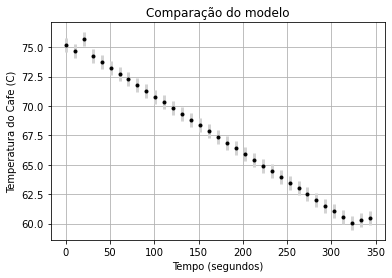

In [41]:
### GRÁFICO COM ERROS ###

#Aqui tiramos os pontos repetidos dos dados reais (para facilitar a visualização) e plotamos um grafico com barra de erro

lista_sem_repetir = [] 
[lista_sem_repetir.append(x) for x in dados_reais if x not in lista_sem_repetir] 

lista_tempo_dados_2 = np.arange(0, len(dados_reais), 1 * len(dados_reais) / len(lista_sem_repetir))

x = lista_tempo_dados_2
dy = erro 
y = lista_sem_repetir

plt.errorbar(x, y, yerr=dy, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title("Comparação do modelo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Temperatura do Cafe (C)")
plt.grid(True)
plt.show()

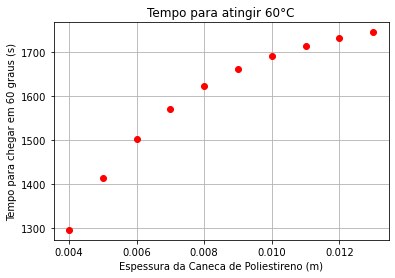

In [42]:
### DADOS PARA A CANECA DE POLIESTIRENO ###
K = 0.03
mr = ((math.pi * (R ** 2) * h) - (math.pi * (r ** 2) * (h-0.01))) * 10
cr = 1400

lista_tempo = np.arange(0, 10000, 2)
ci = [Tc, Tr]

x = odeint(modelo, ci, lista_tempo)
tCafe = x[:,0]
tRecipiente = x[:,1]



dados_reais = [75.20,74.71,74.71,75.20,75.20,75.20,75.68,75.20,75.20,75.20,75.20,75.20,75.20,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.22,74.22,74.22,74.71,74.22,74.22,74.22,73.73,73.73,73.73,73.73,73.73,73.73,73.73,73.73,73.73,73.24,73.24,73.73,73.24,73.24,73.24,73.24,72.75,72.75,72.75,72.75,73.24,72.75,72.75,72.75,72.27,72.27,72.27,72.27,72.27,72.27,72.75,72.27,71.78,72.27,72.27,71.78,71.78,71.78,71.78,71.78,71.29,71.29,71.78,71.29,70.80,71.29,71.29,71.29,71.29,71.29,70.80,71.29,70.80,70.80,70.80,70.80,70.80,70.80,70.31,70.80,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,70.31,69.82,69.82,69.82,69.34,69.82,69.82,69.82,69.82,69.82,69.34,69.34,69.34,69.82,69.34,69.34,69.34,68.85,69.34,69.34,69.82,68.85,68.85,68.85,68.85,68.85,68.85,68.85,68.36,68.85,68.36,68.36,68.85,68.36,68.36,68.36,68.36,68.36,67.87,68.36,68.36,68.36,68.36,67.87,67.87,67.87,67.87,67.87,67.87,67.87,67.87,67.87,67.38,67.38,67.87,67.38,67.38,67.38,67.38,67.38,66.89,67.38,66.89,66.89,66.89,67.38,66.89,66.89,66.89,66.89,66.89,66.89,66.41,66.89,66.41,66.41,66.89,66.41,66.41,66.41,66.41,66.41,65.92,66.89,65.92,66.41,65.92,65.92,65.92,65.92,65.92,65.92,65.92,65.92,65.43,65.92,65.43,65.43,65.43,65.43,65.43,65.92,64.94,65.43,65.43,65.43,64.94,65.43,64.94,65.43,64.94,64.94,64.94,64.94,64.94,64.94,64.45,64.94,64.45,64.94,64.45,64.45,64.45,64.45,64.45,64.45,64.94,64.45,64.45,64.94,63.96,63.96,64.45,63.96,64.45,63.96,63.96,64.45,63.96,63.96,64.45,63.96,63.48,63.96,63.48,63.48,63.48,63.48,63.48,63.48,63.48,63.48,63.48,63.96,63.48,63.48,63.48,63.48,62.99,63.48,62.99,62.99,62.99,62.99,62.99,62.99,62.99,62.99,62.99,62.50,62.99,62.99,62.99,62.50,62.50,62.50,62.50,62.99,62.50,62.50,62.50,62.50,62.99,62.50,62.50,62.50,62.01,62.50,62.01,62.01,62.01,62.01,62.50,62.01,62.01,62.01,62.01,62.01,62.01,61.52,62.01,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.52,61.04,61.52,61.04,61.52,61.04,61.04,61.52,61.04,61.04,61.04,61.04,61.04,61.04,61.04,61.04,61.04,61.04,60.55,61.04,60.55,60.55,61.04,60.55,60.55,60.55,60.55,61.04,61.04,61.04,60.55,60.55,60.06,60.55,60.55,60.55,60.55,60.55,60.34,60.34,60.34,60.50]

lista_tempo_dados = np.arange(0, len(dados_reais), 1)

x_dado = odeint(modelo, ci, lista_tempo_dados)
tCafe_2 = x_dado[:,0]



lista_espessura = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010]
lista_odeint = []

for i in lista_espessura:
    x = odeint(modelo2, ci, lista_tempo, args=(R+i,))
    lista_odeint.append(x[:,0])
    

lista_tempo_temp = []
lista_espessura_grafico = []
for i in lista_espessura:
    lista_espessura_grafico.append(R - r + i)
for i in lista_odeint:
    lista_tempo_temp.append(conclusivo(i, lista_tempo))
    
plt.plot(lista_espessura_grafico, lista_tempo_temp, 'ro')
plt.title("Tempo para atingir 60°C")
plt.xlabel("Espessura da Caneca de Poliestireno (m)")
plt.ylabel("Tempo para chegar em 60 graus (s)")
plt.grid(True)